<a href="https://colab.research.google.com/github/ZahraEk/Speech/blob/main/EX3_Q1_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5314 sha256=726bdb1a23bb50a691fac25460cc90c2d65f88f573fc7b515b658e578dd33f26
  Stored in directory: /root/.cache/pip/wheels/5b/cc/44/62f60769f89e834ab2124c69de4005c771e0ff06af908bbbf3
Successfully built dtw


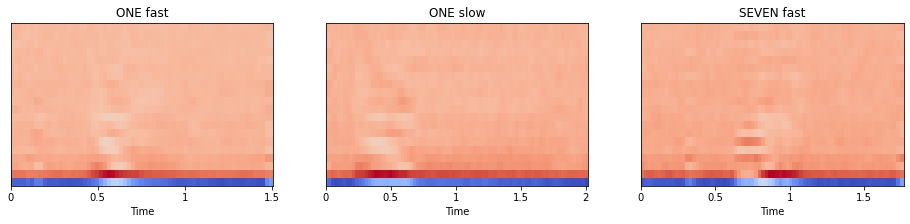

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from dtw import dtw
from numpy.linalg import norm

#load wave files
y1, sr1 = librosa.load('drive/MyDrive/EX3/1fast.wav')
y2, sr2 = librosa.load('drive/MyDrive/EX3/1slow.wav')
y3, sr3 = librosa.load('drive/MyDrive/EX3/7fast.wav')

#compute mfccs
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)
mfcc3 = librosa.feature.mfcc(y3, sr3)

#display mfccs
fig, ax = plt.subplots(ncols=3, figsize=(16,3))

librosa.display.specshow(mfcc1, x_axis="time", ax=ax[0])
librosa.display.specshow(mfcc2, x_axis="time", ax=ax[1])
librosa.display.specshow(mfcc3, x_axis="time", ax=ax[2])

ax[0].set_title("ONE fast")
ax[1].set_title("ONE slow")
ax[2].set_title("SEVEN fast")
plt.show   

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q1/mfccs_q1.jpg')

Normalized distance between 1fast & 1slow : 10216.018028259277
Normalized distance between 1fast & 7fast : 10180.282615661621


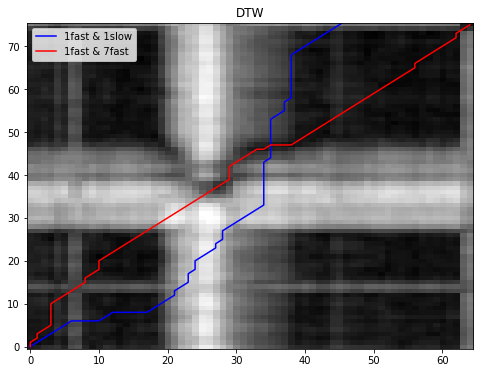

In [3]:
#compute dtw foe 1fast & 1slow
dist1, cost1, acc_cost1, path1 = dtw(mfcc1.T, mfcc2.T, dist=lambda x, y: norm(x - y, ord=1))
print ('Normalized distance between 1fast & 1slow :', dist1)

#compute dtw foe 1fast & 7fast
dist2, cost2, acc_cost2, path2 = dtw(mfcc1.T, mfcc3.T, dist=lambda x, y: norm(x - y, ord=1))
print ('Normalized distance between 1fast & 7fast :', dist2)

#display dtw
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(cost1.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
plt.plot(path1[0], path1[1], 'b', label="1fast & 1slow")
plt.xlim((-0.5, cost1.shape[0]-0.5))
plt.ylim((-0.5, cost1.shape[1]-0.5))

ax.imshow(cost2.T, origin='lower', cmap='gray', interpolation='nearest', aspect='auto')
plt.plot(path2[0], path2[1], 'r', label="1fast & 7fast")
plt.xlim((-0.5, cost2.shape[0]-0.5))
plt.ylim((-0.5, cost2.shape[1]-0.5))

plt.title("DTW")
plt.legend()

#save figure
fig.savefig('drive/MyDrive/EX3/EX3_Q1/dtw_q1.jpg')